In [1]:
import os
import numpy as np
import pickle

import matplotlib.pyplot as plt

from bcnf.utils import get_dir
from bcnf.simulation.sampling import generate_data_old

In [2]:
T = 1.5
dt = 1/60

In [3]:
dataset_name = "fixed_data_render_2s_15FPS_1"
with open(os.path.join(get_dir('data', 'bcnf-data'), dataset_name + '.pkl'), 'rb') as f:
    data = pickle.load(f)

# data = generate_data_old(T=T, dt=dt, N=2000, break_on_impact=False)

In [5]:
X = np.array(data['traj'])
X.shape

(1000, 30, 3)

Text(0.5, 0.98, 'New Sampling')

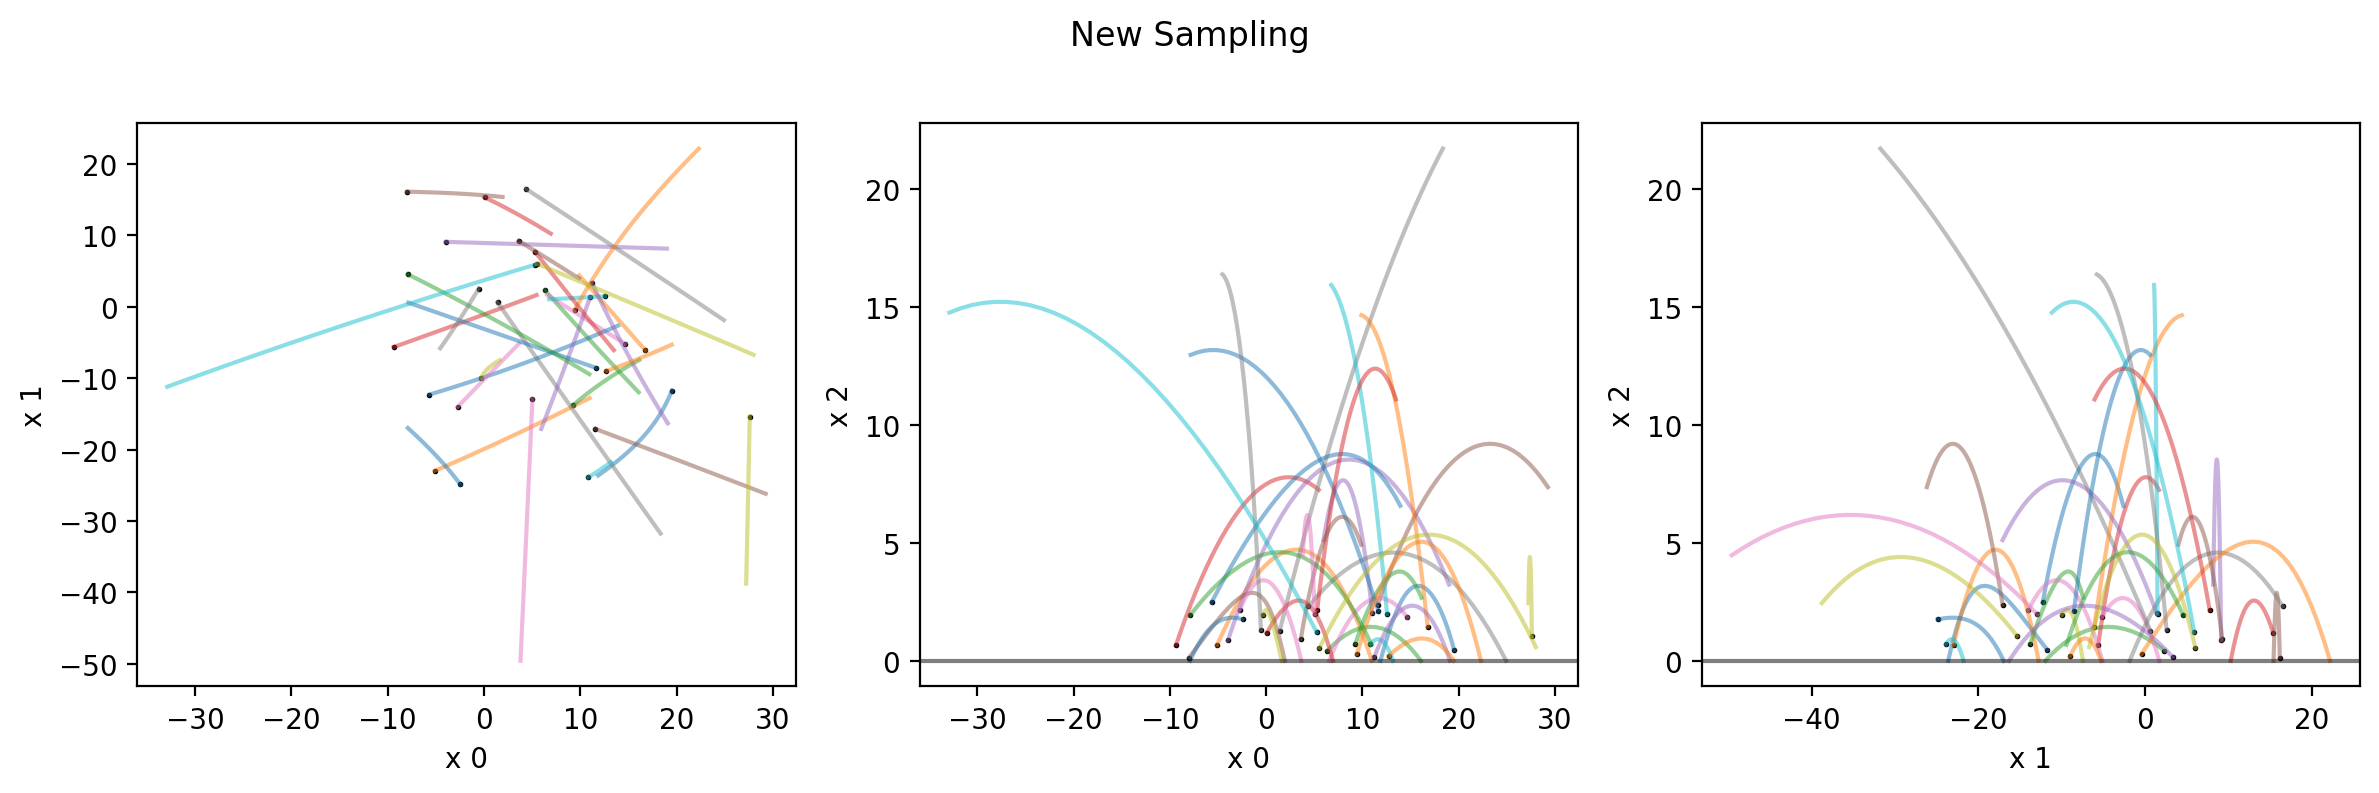

In [6]:
N_TRAJECTORIES = 32

fig, axes = plt.subplots(1, 3, figsize=(12, 4), dpi=200)

for ax, (i, j) in zip(axes, [(0, 1), (0, 2), (1, 2)]):
    ax.plot(X[:N_TRAJECTORIES, :, i].T, X[:N_TRAJECTORIES, :, j].T, alpha=0.5)
    ax.set_xlabel(f"x {i}")
    ax.set_ylabel(f"x {j}")
    ax.scatter(X[:N_TRAJECTORIES, 0, i], X[:N_TRAJECTORIES, 0, j], color="black", s=1)

    if j == 2:
        # Draw the ground
        ax.axhline(0, color="black", alpha=0.5)

fig.tight_layout()
fig.subplots_adjust(top=0.85)
fig.suptitle("New Sampling")

In [7]:
X.shape

(1000, 30, 3)

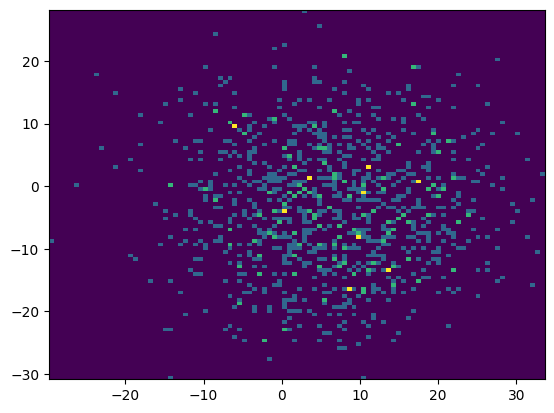

In [8]:
plt.hist2d(X[:,0, 0], X[:, 0, 1], bins=100,);